## Acquire the Zillow Data

The Zillow data that I am targeting includes only 'single unit properties' that had a transaction in the months of May-August 2017.

In [1]:
import numpy as np
import pandas as pd
import env

In [2]:
#Set up mysql query
zillow_query = """
SELECT * FROM properties_2017
LEFT JOIN predictions_2017 ON predictions_2017.parcelid = properties_2017.parcelid
LEFT JOIN heatingorsystemtype ON heatingorsystemtype.heatingorsystemtypeid = properties_2017.heatingorsystemtypeid
LEFT JOIN propertylandusetype ON propertylandusetype.propertylandusetypeid = properties_2017.propertylandusetypeid
WHERE (properties_2017.propertylandusetypeid = 261
	OR properties_2017.propertylandusetypeid = 279)
	AND (predictions_2017.transactiondate >= '2017-05-01'
		AND predictions_2017.transactiondate <= '2017-08-31');
"""

In [3]:
#Set up mysql url
zillow_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'

In [4]:
#Acquire data
zillow = pd.read_sql(zillow_query, zillow_url)
zillow.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxdelinquencyyear,censustractandblock,id,parcelid,logerror,transactiondate,heatingorsystemtypeid,heatingorsystemdesc,propertylandusetypeid,propertylandusedesc
0,616260,11721753,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,NaN,6.037220e+13,1018,11721753,0.017785,2017-07-21,7.0,Floor/Wall,261,Single Family Residential
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,15.0,6.037901e+13,1248,11289917,-0.362001,2017-06-23,2.0,Central,261,Single Family Residential
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,NaN,6.037232e+13,1772,11705026,-0.146056,2017-06-30,2.0,Central,261,Single Family Residential
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,...,NaN,6.059064e+13,2028,14269464,0.021085,2017-06-01,NaN,None,261,Single Family Residential
4,451211,11446756,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,NaN,6.037650e+13,2681,11446756,-0.163064,2017-08-23,7.0,Floor/Wall,261,Single Family Residential


In [5]:
#Take a quick look at the data
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            28124 non-null  int64  
 1   parcelid                      28124 non-null  int64  
 2   airconditioningtypeid         7303 non-null   float64
 3   architecturalstyletypeid      33 non-null     float64
 4   basementsqft                  25 non-null     float64
 5   bathroomcnt                   28124 non-null  float64
 6   bedroomcnt                    28124 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         17811 non-null  float64
 9   calculatedbathnbr             28050 non-null  float64
 10  decktypeid                    213 non-null    float64
 11  finishedfloor1squarefeet      2439 non-null   float64
 12  calculatedfinishedsquarefeet  28077 non-null  float64
 13  f

In [6]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
id,28124.0,1.503275e+06,8.586095e+05,3.490000e+02,7.647012e+05,1.510903e+06,2.245880e+06,2.982270e+06
parcelid,28124.0,1.304239e+07,3.747700e+06,1.071186e+07,1.151380e+07,1.259670e+07,1.414914e+07,1.676878e+08
airconditioningtypeid,7303.0,2.477475e+00,3.888159e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,33.0,7.575758e+00,3.631721e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,25.0,6.348800e+02,4.638359e+02,1.000000e+02,3.140000e+02,6.000000e+02,7.860000e+02,1.969000e+03
bathroomcnt,28124.0,2.316509e+00,1.016983e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01
bedroomcnt,28124.0,3.309487e+00,9.430731e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
buildingqualitytypeid,17811.0,6.289035e+00,1.712753e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,28050.0,2.322068e+00,1.011969e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01
decktypeid,213.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


Key Takeaways:

* Multiple 'id' columns will need to be removed.
* 'basementsqft' has only 25 entries, so it will be removed.
* 'buildingqualitytypeid' does not seem to be associated with any other column, so it will be dropped.
* Many columns will be dropped since they do not have enough data points and there is no easy way to fill in the missing values.
* It will be easier to simply choose which columns I want to keep rather than manually remove the unwanted columns.

## Prepare the Zillow data

The MVP will only use the calculated square feet of the home, the number of bedrooms, and the number of bathrooms to estimate the tax value of the home. Will also need 'taxvaluedollarcnt' because that is the target variable and 'taxamount' because I need to calculate 'tax_rate' for each county. Including 'fips' since that identifies the county each property resides in.

In [7]:
zillow = zillow[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'taxvaluedollarcnt', 'taxamount']]
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,taxvaluedollarcnt,taxamount
0,3.0,2.0,1316.0,6037.0,205123.0,2627.48
1,3.0,2.0,1458.0,6037.0,136104.0,2319.90
2,2.0,1.0,1421.0,6037.0,35606.0,543.69
3,4.0,3.0,2541.0,6059.0,880456.0,9819.72
4,3.0,2.0,1491.0,6037.0,107110.0,1399.27


In [8]:
#rename the columns to be more understandable and easier to read
zillow.rename(columns = {'bedroomcnt':'bedroom_count',
                    'bathroomcnt':'bathroom_count',
                    'calculatedfinishedsquarefeet':'home_area',
                    'taxvaluedollarcnt':'tax_value',
                    'taxamount':'tax_amount'}, inplace = True)
zillow.head()

,bedroom_count,bathroom_count,home_area,fips,tax_value,tax_amount
0,3.0,2.0,1316.0,6037.0,205123.0,2627.48
1,3.0,2.0,1458.0,6037.0,136104.0,2319.90
2,2.0,1.0,1421.0,6037.0,35606.0,543.69
3,4.0,3.0,2541.0,6059.0,880456.0,9819.72
4,3.0,2.0,1491.0,6037.0,107110.0,1399.27


In [9]:
#How many null values?
zillow.isna().sum()

bedroom_count      0
bathroom_count     0
home_area         47
fips               0
tax_value          1
tax_amount         1
dtype: int64

Since there are so few, I will impute the missing 'area' values using the median and just remove the rows that are missing 'tax_value' and 'tax_amount'.

In [10]:
zillow.home_area = zillow.home_area.fillna(zillow.home_area.median())

In [11]:
zillow = zillow.dropna()

In [12]:
#Any null values left?
zillow.isna().sum()

bedroom_count     0
bathroom_count    0
home_area         0
fips              0
tax_value         0
tax_amount        0
dtype: int64

In [13]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28122 entries, 0 to 28123
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   28122 non-null  float64
 1   bathroom_count  28122 non-null  float64
 2   home_area       28122 non-null  float64
 3   fips            28122 non-null  float64
 4   tax_value       28122 non-null  float64
 5   tax_amount      28122 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


In [14]:
zillow.describe()

,bedroom_count,bathroom_count,home_area,fips,tax_value,tax_amount
count,28122.000000,28122.000000,28122.000000,28122.000000,2.812200e+04,28122.000000
mean,3.309473,2.316532,1934.557073,6049.521229,5.350114e+05,6509.046910
std,0.943096,1.017016,994.916877,21.302687,7.076928e+05,8221.785571
min,0.000000,0.000000,240.000000,6037.000000,1.000000e+03,51.260000
25%,3.000000,2.000000,1279.000000,6037.000000,1.986355e+05,2705.532500
50%,3.000000,2.000000,1675.000000,6037.000000,3.827985e+05,4735.315000
75%,4.000000,3.000000,2325.000000,6059.000000,6.328175e+05,7528.527500
max,12.000000,11.000000,17245.000000,6111.000000,2.385837e+07,276797.830000


In [15]:
zillow.head()

,bedroom_count,bathroom_count,home_area,fips,tax_value,tax_amount
0,3.0,2.0,1316.0,6037.0,205123.0,2627.48
1,3.0,2.0,1458.0,6037.0,136104.0,2319.90
2,2.0,1.0,1421.0,6037.0,35606.0,543.69
3,4.0,3.0,2541.0,6059.0,880456.0,9819.72
4,3.0,2.0,1491.0,6037.0,107110.0,1399.27


In [16]:
#Now convert bedroom_count, home_area, and tax_value to ints
zillow.bedroom_count = zillow.bedroom_count.astype(int)
zillow.home_area = zillow.home_area.astype(int)
zillow.tax_value = zillow.tax_value.astype(int)

#Convert 'fips' to a string since it is categorical.
zillow.fips = zillow.fips.astype(int)
zillow.fips = zillow.fips.astype(str)

In [17]:
zillow.head()

,bedroom_count,bathroom_count,home_area,fips,tax_value,tax_amount
0,3,2.0,1316,6037,205123,2627.48
1,3,2.0,1458,6037,136104,2319.90
2,2,1.0,1421,6037,35606,543.69
3,4,3.0,2541,6059,880456,9819.72
4,3,2.0,1491,6037,107110,1399.27


In [18]:
zillow.fips.value_counts()

6037    17905
6059     7768
6111     2449
Name: fips, dtype: int64

County names acquired using 'fips' value from: 
https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697

|fips | county name | state |
|:-----|:--------|:-------|
|6037 | Los Angelas | CA |
|6059 | Orange | CA |
|6111 | Ventura | CA |


In [19]:
def change_fips_to_county(value):
    if value == '6037':
        return 'Los Angelas'
    elif value == '6059':
        return 'Orange'
    else:
        return 'Ventura'

In [20]:
zillow.fips = zillow.fips.apply(change_fips_to_county)

In [21]:
zillow.rename(columns = {'fips':'county'}, inplace = True)

In [22]:
zillow['state'] = 'California'
zillow.head()

,bedroom_count,bathroom_count,home_area,county,tax_value,tax_amount,state
0,3,2.0,1316,Los Angelas,205123,2627.48,California
1,3,2.0,1458,Los Angelas,136104,2319.90,California
2,2,1.0,1421,Los Angelas,35606,543.69,California
3,4,3.0,2541,Orange,880456,9819.72,California
4,3,2.0,1491,Los Angelas,107110,1399.27,California


In [23]:
#Now calculate tax_rate for each county using tax_value and tax_amount
zillow['county_tax_rate'] = zillow.tax_amount / zillow.tax_value
zillow.head()

,bedroom_count,bathroom_count,home_area,county,tax_value,tax_amount,state,county_tax_rate
0,3,2.0,1316,Los Angelas,205123,2627.48,California,0.012809
1,3,2.0,1458,Los Angelas,136104,2319.90,California,0.017045
2,2,1.0,1421,Los Angelas,35606,543.69,California,0.015270
3,4,3.0,2541,Orange,880456,9819.72,California,0.011153
4,3,2.0,1491,Los Angelas,107110,1399.27,California,0.013064


In [24]:
#Now remove things that don't make sense and/or are impossible/illegal.
#If something doesn't sound like the average 'single family residential' property, drop it.
zillow = zillow[(zillow.bedroom_count > 0) & (zillow.bathroom_count> 0)]
zillow = zillow[zillow.bedroom_count <= 5]
zillow = zillow[zillow.bathroom_count <= 3]
zillow = zillow[zillow['home_area'] <= 5000]
zillow = zillow[zillow['home_area'] >= (120 * zillow.bedroom_count)]
zillow = zillow[zillow.tax_amount <= 20_000]

In [25]:
#Now remove any outliers and return the prepared dataframe
#remove_outliers function courtesy John Salas from Codeup
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


In [26]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24625 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    24625 non-null  int64  
 1   bathroom_count   24625 non-null  float64
 2   home_area        24625 non-null  int64  
 3   county           24625 non-null  object 
 4   tax_value        24625 non-null  int64  
 5   tax_amount       24625 non-null  float64
 6   state            24625 non-null  object 
 7   county_tax_rate  24625 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [27]:
cols_to_evaluate = zillow.select_dtypes('int').columns.append(zillow.select_dtypes('float').columns)
zillow = remove_outliers(zillow, 2.5, cols_to_evaluate)

In [28]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23004 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    23004 non-null  int64  
 1   bathroom_count   23004 non-null  float64
 2   home_area        23004 non-null  int64  
 3   county           23004 non-null  object 
 4   tax_value        23004 non-null  int64  
 5   tax_amount       23004 non-null  float64
 6   state            23004 non-null  object 
 7   county_tax_rate  23004 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.6+ MB


In [29]:
#Show individual distributions
import matplotlib.pyplot as plt
import seaborn as sns

def get_dists(df):
    #Plot the individual distributions again
    for col in df.columns:
        sns.histplot(x = col, data = df)
        plt.title(col)
        plt.show()

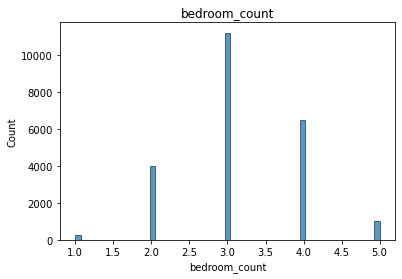

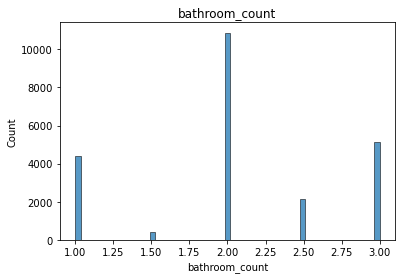

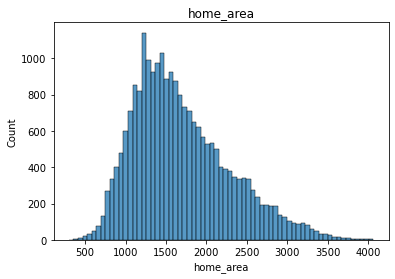

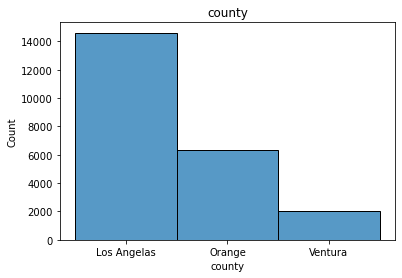

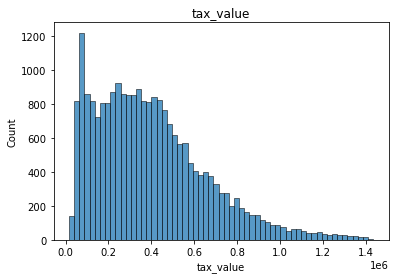

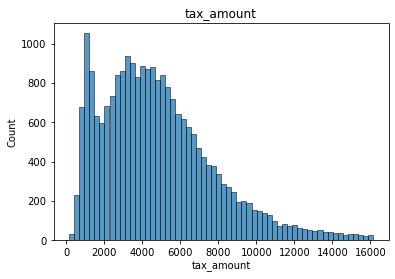

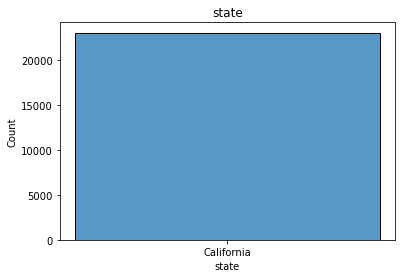

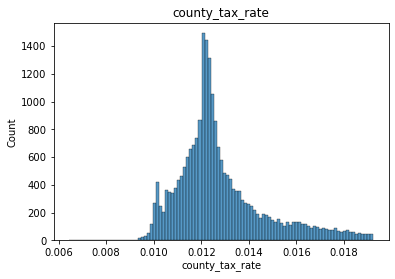

In [30]:
get_dists(zillow)

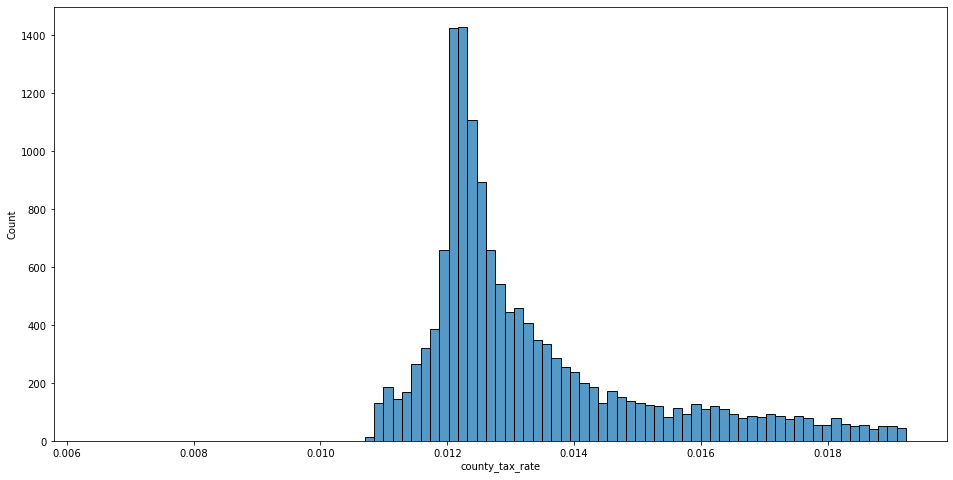

In [31]:
plt.figure(figsize=(16,8))
sns.histplot(data = zillow[zillow.county == 'Los Angelas'].county_tax_rate)
plt.show()

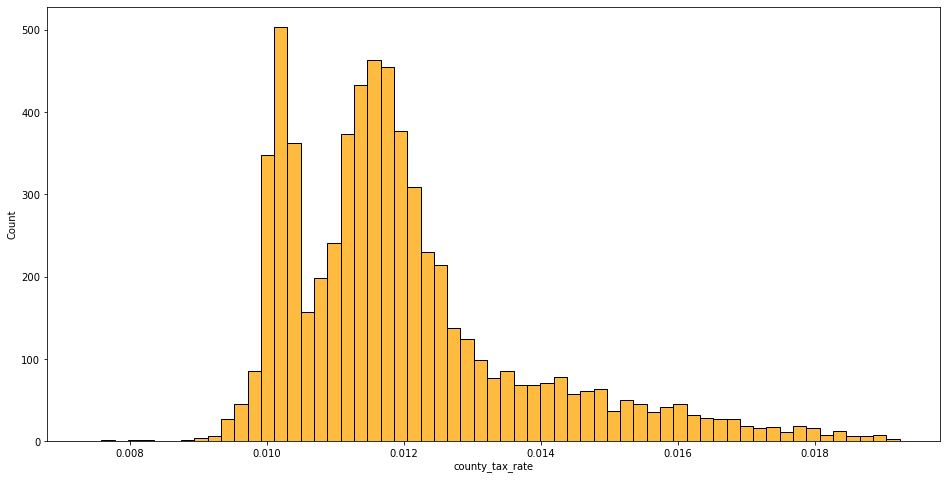

In [32]:
plt.figure(figsize=(16,8))
sns.histplot(data = zillow[zillow.county == 'Orange'].county_tax_rate, color = 'orange')
plt.show()

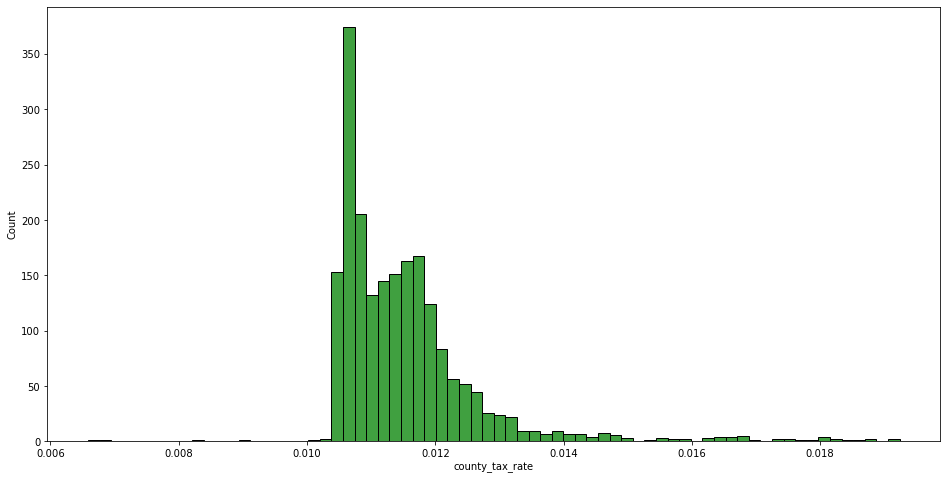

In [33]:
plt.figure(figsize=(16,8))
sns.histplot(data = zillow[zillow.county == 'Ventura'].county_tax_rate, color = 'green')
plt.show()

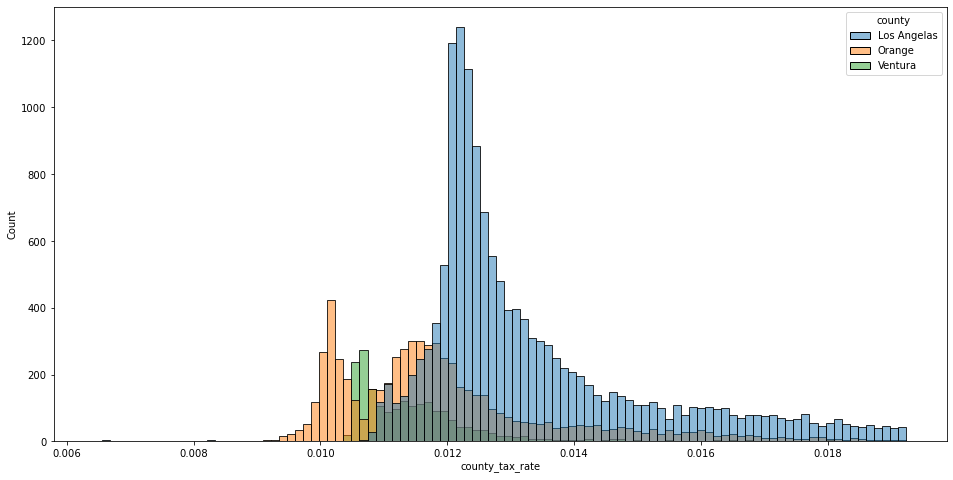

In [34]:
plt.figure(figsize=(16,8))
sns.histplot(x='county_tax_rate', hue = 'county', data = zillow)
plt.show()

In [35]:
zillow.head()

,bedroom_count,bathroom_count,home_area,county,tax_value,tax_amount,state,county_tax_rate
0,3,2.0,1316,Los Angelas,205123,2627.48,California,0.012809
1,3,2.0,1458,Los Angelas,136104,2319.90,California,0.017045
2,2,1.0,1421,Los Angelas,35606,543.69,California,0.015270
3,4,3.0,2541,Orange,880456,9819.72,California,0.011153
4,3,2.0,1491,Los Angelas,107110,1399.27,California,0.013064


The next step is to split the data into train, validate, and test groups. However, since I won't be using 'tax_amount', 'state', 'county', or 'county_tax_rate' in my model, I will go ahead and drop those columns before splitting. I only needed them to make the charts above.

In [36]:
#Drop unnecessary columns
zillow.drop(columns = ['tax_amount', 'state', 'county', 'county_tax_rate'], inplace = True)

In [37]:
zillow.head()

,bedroom_count,bathroom_count,home_area,tax_value
0,3,2.0,1316,205123
1,3,2.0,1458,136104
2,2,1.0,1421,35606
3,4,3.0,2541,880456
4,3,2.0,1491,107110


In [38]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, seed = 123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [39]:
train, validate, test = train_validate_test_split(zillow)

Now, create a wrangle.py file with the functions necessary to reproduce the work above and then test.

In [40]:
#For testing.
import wrangle

zillow = wrangle.wrangle_zillow()
zillow.head()

,bedroom_count,bathroom_count,home_area,county,tax_value,tax_amount,state,county_tax_rate
0,3,2.0,1316,Los Angelas,205123,2627.48,California,0.012809
1,3,2.0,1458,Los Angelas,136104,2319.90,California,0.017045
2,2,1.0,1421,Los Angelas,35606,543.69,California,0.015270
3,4,3.0,2541,Orange,880456,9819.72,California,0.011153
4,3,2.0,1491,Los Angelas,107110,1399.27,California,0.013064


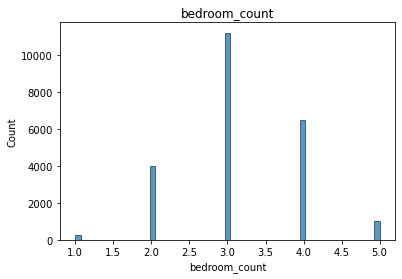

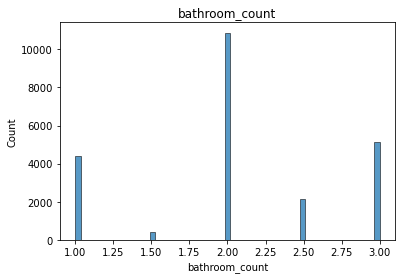

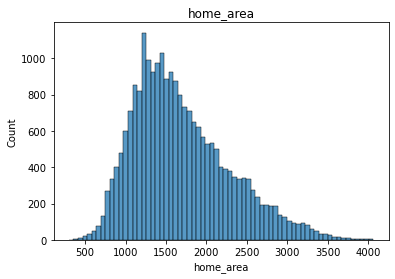

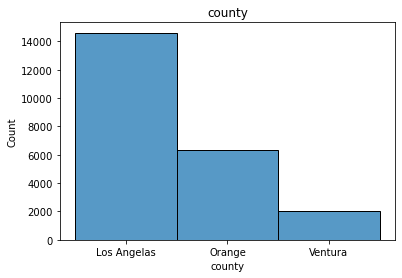

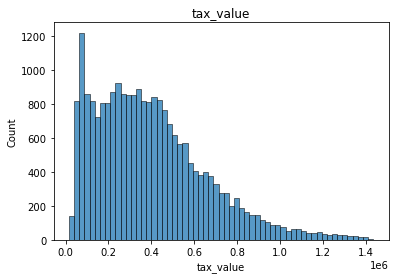

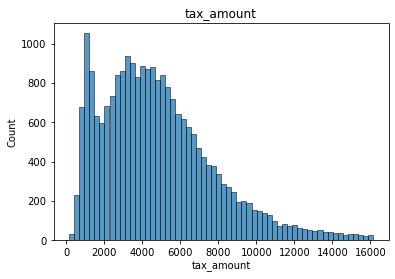

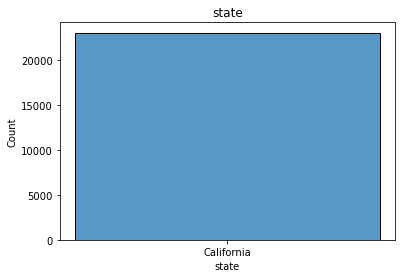

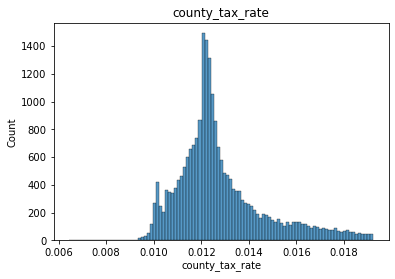

In [41]:
#Plot individual distributions
wrangle.get_dists(zillow)

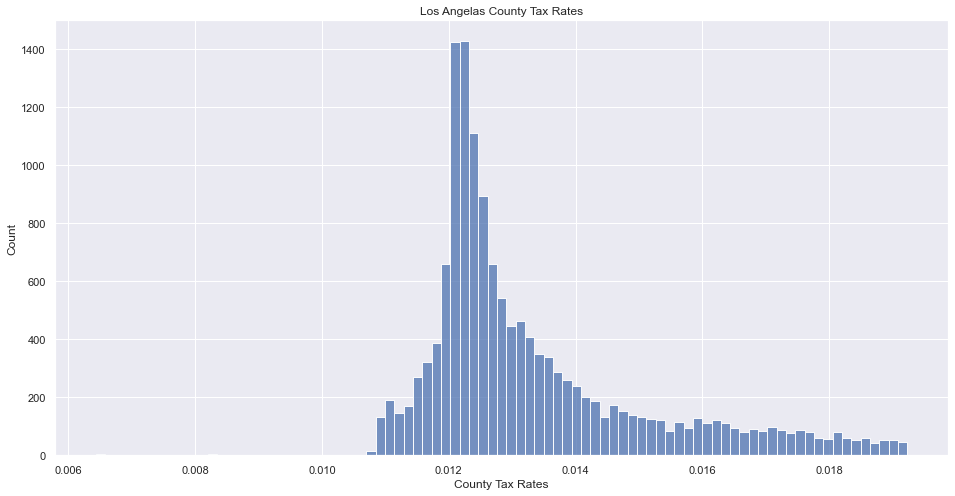

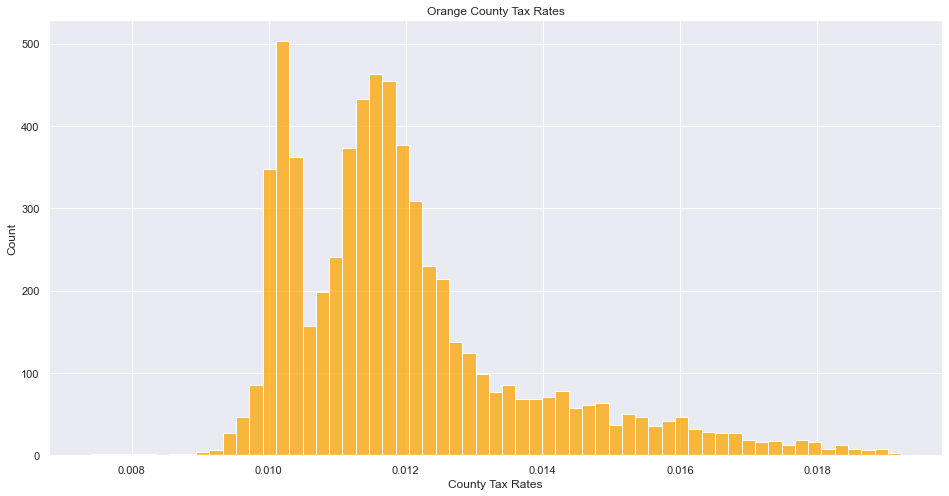

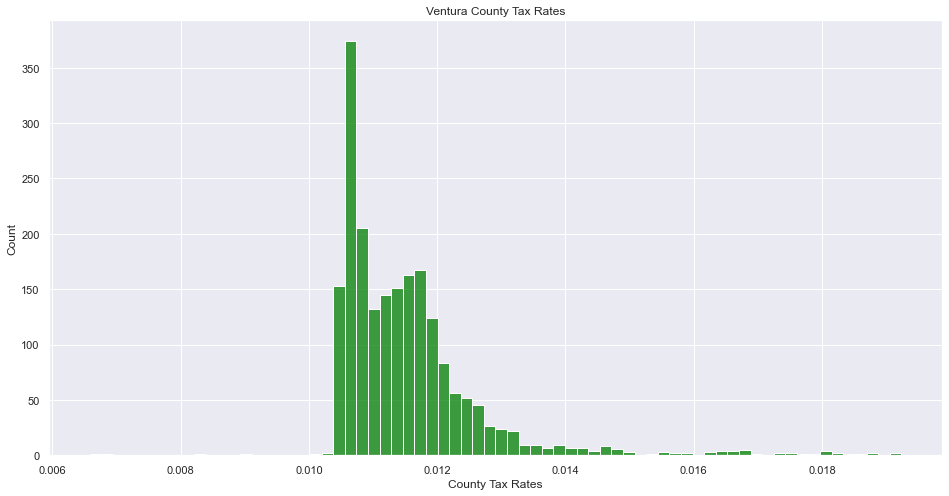

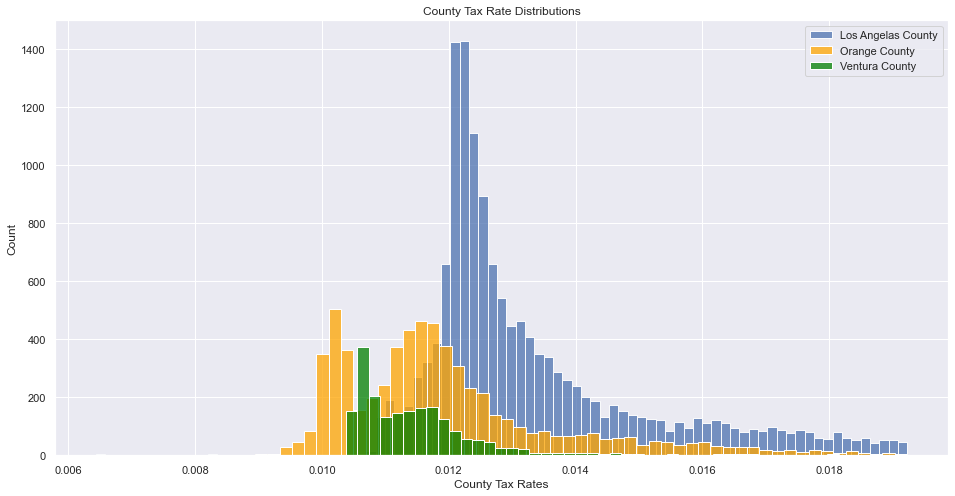

In [42]:
#Get county tax rate distributions
wrangle.get_tax_rate_dists(zillow)

In [43]:
#Split data into train, validate, test groups
train, validate, test = wrangle.train_validate_test_split(zillow)

In [44]:
train.shape, validate.shape, test.shape

((12882, 4), (5521, 4), (4601, 4))

In [45]:
train.head()

,bedroom_count,bathroom_count,home_area,tax_value
23141,4,3.0,3044,648902
2687,4,3.0,2398,967517
27752,3,2.0,1088,240147
6339,3,2.0,1598,564000
4036,3,3.0,2472,769000
